IA & Data science -- 2017-2018
--------
*&copy; Equipe pédagogique: Ludovic Denoyer, Thibault Laugel, Marie-Jeanne Lesot, Christophe Marsala, Olivier Schwander*

# TD-TME09: études et améliorations des K-moyennes

<font size="+1">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

*Double-cliquer ici et insérer les noms et prénoms de votre binôme*

## Préparation

Décompresser l'archive, elle crée le répertoire "tp9" qui contient :
- un fichier ipython à ouvrir (ce fichier-ci)
- un sous-répertoire "data" contenant les bases d'apprentissage utilisées dans cette séance
- un sous-répertoire "IADS2018" (qui contient 2 fichiers python) dont l'utilisation est détaillée un peu plus loin dans ce fichier ipython.

Le but de ce TP est de compléter ce document ipython en ajoutant les fonctions demandées. Avant de commencer, exécuter le bloc suivant afin de pouvoir initialiser des variables utiles 


In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline  

### Chargement du fichier "base_2D.csv"

In [2]:
data_2D = pd.read_csv("data/base-2D.csv")
data_2D[0:5]  # ou bien: data_2D[0:len(data_2D)]

,X,Y
0,0.0,4.0
1,1.0,3.5
2,1.0,1.0
3,2.0,1.0
4,2.0,2.0


Dans la suite de ce TP, il est conseillé de travailler sur des données de type <tt>DataFrame</tt> le plus souvent possible.

**Important**: dans la suite de ce TP, on appelle:

- "base d'apprentissage" le DataFrame contenant l'ensemble des exemples d'apprentissage chargés par la commande précédenteµ
- "base d'exemples" : un DataFrame contenant un ensemble d'exemples (remarque: la base d'apprentissage est le plus grand ensemble d'exemples possible)

## Construction d'un package de fonctions

Dans un premier temps, afin de pouvoir utiliser toutes les fonctions écrites dans le TP précédent (fonctions pour les K-moyennes), vous allez réaliser un package de fonctions qui s'appelle "<tt>IADS2018</tt>".

Le package <tt>IADS2018</tt> est composé ainsi :
- c'est un répertoire dont le nom est <tt>IADS2018</tt>
- ce répertoire contient le fichier <tt>\__init\__.py</tt> qui, dans notre cas, est un fichier vide (mais il est important que ce fichier existe !)
- ce répertoire contient le fichier <<tt>kmoyennes.py</tt> qui est le fichier dans lequel vous devez mettre toutes les fonctions écrites lors du TP précédent sur les K-moyennes.

<font size="+1" color="RED">**[Q]**</font> En utilisant votre éditeur de texte préféré (emacs, gedit, vim,...) ouvrir le fichier <tt>kmoyennes.py</tt> qui se trouve dans le sous-répertoire <tt>IADS2018</tt> et compléter-le en reprenant les fonctions que vous avez écrites dans la séance précédente.

Une fois le fichier <tt>kmoyennes.py</tt> complété et sauvegardé, il est possible d'utiliser les fonctions qui y sont définies en utilisant une commande d'importation:

In [3]:
# Importation des fonctions écrites dans les fichiers python que contient le répertoire (package) IADS2018:
import IADS2018 
import IADS2018.kmoyennes as km

#### Vérification que tout fonctionne bien

Si la recopie de toutes vos fonctions s'est bien déroulée, une fois l'importation faite il est possible de tester les instructions des boites suivantes:

---> type de DataFnorm: <class 'pandas.core.frame.DataFrame'>


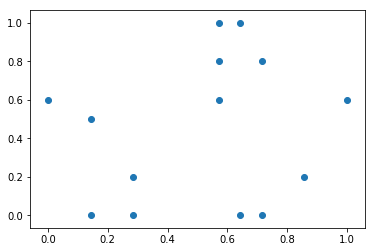

In [4]:
# Affichage des points après normalisation:

DataFnorm = km.normalisation(data_2D)
print("---> type de DataFnorm:",type(DataFnorm))

plt.scatter(DataFnorm['X'],DataFnorm['Y'])

Iteration  0  Inertie :  0.719925170068  Difference :  2.2560660835762887
Iteration  1  Inertie :  0.719925170068  Difference :  0.0


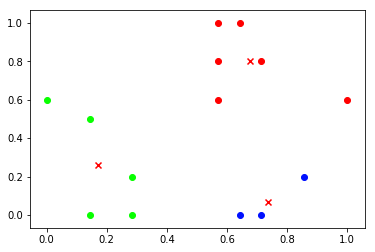

In [5]:
les_centres, l_affectation = km.kmoyennes(3, DataFnorm, 0.05, 100)

km.affiche_resultat(DataFnorm,les_centres,l_affectation)

## Travail à réaliser

On peut reprendre les fonctions écrites dans les tp sur l'apprentissage supervisé pour générer des ensembles de points en 2 dimensions afin de tester la fonction <tt>kmoyennes()</tt>. 
Par exemple, pour générer des points répartis en 2 groupes:

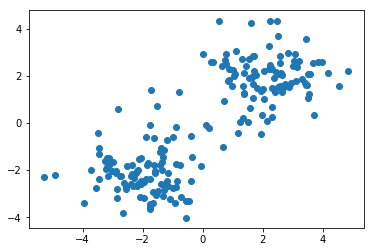

In [6]:
def createGaussianDataset(group1_center,group2_center,sigma,nb_points):
        group1 = np.random.multivariate_normal(group1_center,sigma,nb_points)
        group2 = np.random.multivariate_normal(group2_center,sigma,nb_points)
        
        return np.concatenate((group1, group2))

# Utilisation de cette fonction :
the_set = createGaussianDataset(np.array([2,2]),np.array([-2,-2]),np.array([[1.1,0],[0,1.1]]),100)

# Affichage des points obtenus
data_random = pd.DataFrame(the_set, columns = ['X', 'Y'])
plt.scatter(data_random['X'],data_random['Y'])

# Normalisation pour pouvoir utiliser la fonction kmoyennes() par la suite:
DataRandom = km.normalisation(data_random)

<font size="+1" color="RED">**[Q]**</font> Tester la fonction <tt>kmoyennes()</tt> sur le jeu de données généré en utilisant différentes valeurs de $K$.

Iteration  0  Inertie :  4.35537741205  Difference :  20.221769389728497
Iteration  1  Inertie :  4.21756304946  Difference :  0.13781436259337632
Iteration  2  Inertie :  4.20033521849  Difference :  0.01722783097180347


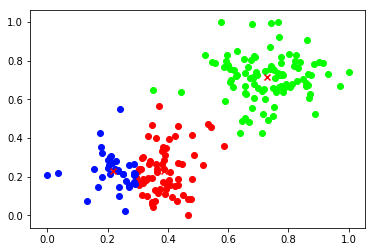

In [7]:
les_centresRand1, l_affectationRand1 = km.kmoyennes(3, DataRandom, 0.05, 100)

km.affiche_resultat(DataRandom,les_centresRand1,l_affectationRand1)

Iteration  0  Inertie :  4.05044369174  Difference :  20.526703110039932
Iteration  1  Inertie :  3.80044050947  Difference :  0.2500031822683719
Iteration  2  Inertie :  3.77546390017  Difference :  0.02497660930249035


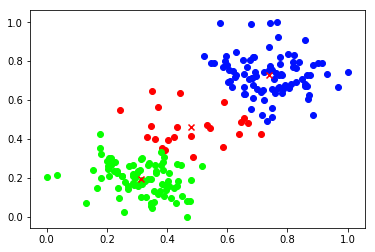

In [8]:
les_centresRand1, l_affectationRand1 = km.kmoyennes(3, DataRandom, 0.05, 100)

km.affiche_resultat(DataRandom,les_centresRand1,l_affectationRand1)

Iteration  0  Inertie :  10.0781117094  Difference :  14.499035092352406
Iteration  1  Inertie :  5.0874247554  Difference :  4.990686954025969
Iteration  2  Inertie :  4.87042199427  Difference :  0.21700276113566463
Iteration  3  Inertie :  4.87042199427  Difference :  0.0


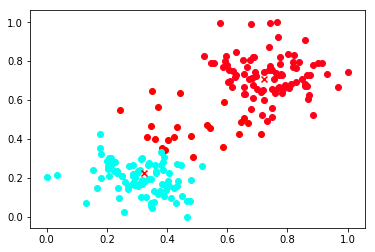

In [9]:
les_centresRand1, l_affectationv = km.kmoyennes(2, DataRandom, 0.05, 100)

km.affiche_resultat(DataRandom,les_centresRand1,l_affectationRand1)

Iteration  0  Inertie :  3.19398328206  Difference :  21.383163519718323
Iteration  1  Inertie :  3.08785656905  Difference :  0.1061267130077983
Iteration  2  Inertie :  2.84675228139  Difference :  0.24110428765958103
Iteration  3  Inertie :  2.64755678307  Difference :  0.19919549832010652
Iteration  4  Inertie :  2.58266076478  Difference :  0.06489601829386826
Iteration  5  Inertie :  2.53326593051  Difference :  0.04939483426647495


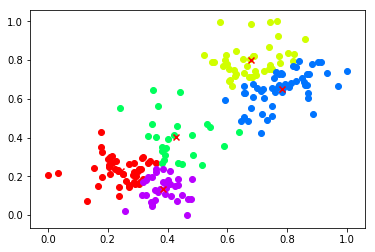

In [10]:
les_centresRand1, l_affectationRand1 = km.kmoyennes(5, DataRandom, 0.05, 100)

km.affiche_resultat(DataRandom,les_centresRand1,l_affectationRand1)

Iteration  0  Inertie :  2.29679266115  Difference :  22.28035414062677
Iteration  1  Inertie :  2.17006905337  Difference :  0.12672360778571345
Iteration  2  Inertie :  2.12696560095  Difference :  0.04310345241481839


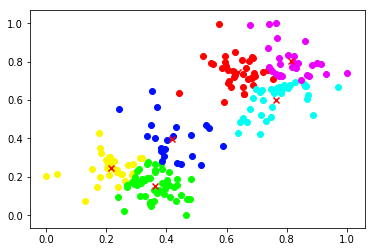

In [11]:
les_centresRand2, l_affectationRand2 = km.kmoyennes(6, DataRandom, 0.05, 100)

km.affiche_resultat(DataRandom,les_centresRand2,l_affectationRand2)

## Evaluation du résultat d'un clustering

L'évaluation du résultat d'un clustering, c'est-à-dire la mesure de la "qualité" des clusters obtenus, s'effectue selon 2 critères :
- la **compacité** des clusters obtenus
- la **séparabilité** des clusters obtenus


### Mesurer la compacité d'un cluster

Il existe plusieurs possibilités pour définir une mesure de compacité d'un cluster. 

Une telle mesure évalue la proximité des exemples qui sont affectés au cluster.

Exemples de mesures de compacité (en utilisant les notations du cours) :
- la mesure $J_k$ qui mesure l'inertie intra-cluster et qui a été implémentée dans la fonction <tt>inertie_cluster()</tt>

- la mesure de distance intra-cluster $D_{k}$ qui évalue la distance maximale entre 2 exemples d'un même cluster pour l'ensemble des clusters obtenus:
$$D_k = \max_{x, y \in C_k } (d_{E}(x,y))$$


<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <tt>dist_intracluster</tt> qui, étant donné un ensemble d'exemples, correspondant aux exemples d'un même cluster, rend la valeur de la distance intra-cluster correspondante.

In [12]:
def dist_intracluster(df):
    maxdist=0
    for i in range(len(df)):
        for j in range(i+1,len(df)):
           
            dist=km.dist_vect(df.iloc[i],df.iloc[j])
            if(maxdist<dist):
                maxdist=dist
            
    return maxdist

In [13]:
# Avec les données jouet:
for k in range(0,len(l_affectation)):
    DF = DataFnorm.iloc[l_affectation[k]]
    print("pour "+str(k)+" : inertie = " + str(km.inertie_cluster(DF)) + "\tdistance = "+  str(dist_intracluster(DF)))


pour 0 : inertie = 0.300306122449	distance = 0.58623670082
pour 1 : inertie = 0.369142857143	distance = 0.664554477121
pour 2 : inertie = 0.0504761904762	distance = 0.29311835041


In [14]:
# Avec les données générées aléatoirement:
for k in range(0,len(l_affectation)):
    DF = DataRandom.iloc[l_affectationRand2[k]]
    print("pour "+str(k)+" : inertie = " + str(km.inertie_cluster(DF)) + "\tdistance = "+  str(dist_intracluster(DF)))


pour 0 : inertie = 0.355896524204	distance = 0.406316953186
pour 1 : inertie = 0.289063115053	distance = 0.358019907985
pour 2 : inertie = 0.385668795873	distance = 0.305885697126


Etant donné une partition $P$, on peut mesurer la compacité globale des clusters de cette partition en agrégeant les compacités intra-custer de chaque cluster.

Ainsi, dans notre cas, on peut définir 2 mesures de compacité globable:
- la compacité inertielle $Co_{inertie}$ d'une partition $P$:
    $$Co_{inertie}(P) = J(P)$$
- la compacité intra-clusters $Co_{dist}$ d'une partition $P$
$$Co_{dist}(P) = \max_{k=1..K} D_k$$


<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <tt>global_intraclusters</tt> qui, étant donné une base d'exemples et un 
dictionnaire d'affectation d'exemples à des clusters rend la valeur de la distance intra-clusters correspondante.

In [15]:
def global_intraclusters(df,la):
    
    maxdist=0
    
    for k, liste in la.items():
        
        dist=dist_intracluster(df.iloc[liste])
        
        if(maxdist<dist):
            maxdist=dist
            
    
    return maxdist
    

In [16]:
# Exemples:
print("Données jouet: "+str(global_intraclusters(DataFnorm,l_affectation)))
print("Données aléatoire: "+str(global_intraclusters(DataRandom,l_affectationRand2)))

print("Avec l'inertie :")
print("Données jouet: "+str(km.inertie_globale(DataFnorm,l_affectation)))
print("Données aléatoire: "+str(km.inertie_globale(DataRandom,l_affectationRand2)))


Données jouet: 0.664554477121
Données aléatoire: 0.421664833741
Avec l'inertie :
Données jouet: 0.719925170068
Données aléatoire: 2.12696560095


### Mesurer la séparabilité

Une mesure de séparabilité évalue la distance entre les groupes d'un clustering d'une partition $P$ donnée.

Il existe plusieurs mesures de ce genre, par exemple, la mesure la plus évidente est la distance minimale entre deux clusters de la :
    $$Se_{min}(P) = \min_{k= 1..K, l=1..K}(d_E(c_k,c_l)) $$


<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <tt>sep_clusters</tt> qui, étant donné un ensemble de centres rend la valeur de la distance minimale entre 2 centres.
    

In [17]:
def sep_clusters(centroids):
    
    mindist=10000000000
    
    for i in range(len(centroids)):
        for j in range(i+1,len(centroids)):
            
            dist=km.dist_vect(centroids.iloc[i], centroids.iloc[j])
            
            if(mindist>dist):
                mindist=dist
                
    
    return mindist
            

In [18]:
# Avec les données jouet:
print("Séparabilité: "+str(sep_clusters(les_centres)))


Séparabilité: 0.598739416515


In [19]:
# Avec les données générées aléatoirement:
print("Séparabilité: "+str(sep_clusters(les_centresRand2)))


Séparabilité: 0.16994008298


### Evaluation d'un clustering

Pour obtenir une évaluation du résultat d'un clustering, on combine une mesure de sa séparabilité et une mesure de sa compacité globale.
Par exemple (remarque: nous donnons ici des versions adaptées à notre tp de ces mesures):
- index de Dunn d'une partition $P$:
$$I_{Dunn}(P)= \frac{Co_{dist}(P)}{Se_{min}(P)}$$

- index de Xie et Beni d'une partition $P$:
$$I_{XB}(P) = \frac{Co_{inertie}(P)}{Se_{min}(P)}$$

Dans les 2 cas, une bonne partition minimise la valeur de l'index.

<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <tt>evaluation()</tt> qui prend en argument une chaîne de caractères donnant le nom de l'index choisi ("Dunn" ou "XB"), une base d'exemples, un ensemble de centres et une affectation, et rend la valeur de l'index correspondant.

In [20]:
def evaluation(index, df, centroids, la):
    
    if(index=="Dunn"):
        
        return global_intraclusters(df,la)/sep_clusters(centroids)
    
    elif(index=="XB"):
        
        return km.inertie_globale(df,la)/sep_clusters(centroids)
    
    else:
        return -1

In [21]:
print("Pour les données jouet:")
print("\tDunn:\t"+str(evaluation("Dunn",DataFnorm,les_centres,l_affectation)))
print("\tXB:\t"+str(evaluation("XB",DataFnorm,les_centres,l_affectation)))

print("Pour les données aléatoires (6 clusters):")
print("\tDunn:\t"+str(evaluation("Dunn",DataRandom,les_centresRand2,l_affectationRand2)))
print("\tXB:\t"+str(evaluation("XB",DataRandom,les_centresRand2,l_affectationRand2)))

print("Pour les données aléatoires (5 clusters):")
print("\tDunn:\t"+str(evaluation("Dunn",DataRandom,les_centresRand1,l_affectationRand1)))
print("\tXB:\t"+str(evaluation("XB",DataRandom,les_centresRand1,l_affectationRand1)))


Pour les données jouet:
	Dunn:	1.10992271227
	XB:	1.20240149589
Pour les données aléatoires (6 clusters):
	Dunn:	2.48125590118
	XB:	12.5159736517
Pour les données aléatoires (5 clusters):
	Dunn:	2.56361717422
	XB:	14.8140234013


## Optimiser le nombre de clusters

La mesure d'évaluation d'un clustering précédente peut être utilisée pour déterminer automatiquement une bonne valeur pour $K$ (le nombre de clusters de la partition).

Ainsi, pour une base d'exemples $X$, l'approche suivante peut être utilisée :
- choisir une valeur pour $K$
- appliquer l'algorithme des K-moyennes avec cette valeur $K$ sur la base $X$
- évaluer le résultat du clustering obtenu en utilisant un index
- recommencer pour une autre valeur de $K$ et comparer le résultat, 
on choisit alors la valeur de $K$ qui a donné la meilleure partition selon le critère choisi.


<font size="+1" color="RED">**[Q]**</font> Implémenter l'approche d'optimisation du nombre de clusters. Vous devez tester des valeurs de $K$ de $2$ à $10$ et afficher la valeur optimale du nombre de clusters. Vous tracerez la courbe donnant la valeur de l'index obtenue pour chaque valeur de $K$ testée. Vous réaliserez cette expérimentation d'abord avec l'index de Dunn, puis avec l'index de Xie-Beni.

Tester plusieurs bases d'exemples, en particulier, construire des bases d'exemples aléatoires contenant plusieurs groupes (2, 3, 4, 5 groupes) et afficher la courbe de la variation de l'index pour des valeurs de $K$ variant de 2 à 10.

In [22]:
list_k=[]
list_eval_Dunn=[]
list_eval_XB=[]


for k in range(2,10):
    centroids, l_affectation = km.kmoyennes(k, DataRandom, 0.001, 100)
    list_k.append(k)
    list_eval_Dunn.append(evaluation("Dunn",DataRandom,centroids,l_affectation))
    list_eval_XB.append(evaluation("XB",DataRandom,centroids,l_affectation))
    

    
    

Iteration  0  Inertie :  22.578541181  Difference :  1.998605620778303
Iteration  1  Inertie :  8.17236098723  Difference :  14.406180193767748
Iteration  2  Inertie :  4.94229887271  Difference :  3.2300621145258006
Iteration  3  Inertie :  4.8770063576  Difference :  0.0652925151078847
Iteration  4  Inertie :  4.87256775923  Difference :  0.00443859836454763
Iteration  5  Inertie :  4.87042199427  Difference :  0.0021457649697556036
Iteration  6  Inertie :  4.87042199427  Difference :  0.0
Iteration  0  Inertie :  15.315399955  Difference :  9.261746846807451
Iteration  1  Inertie :  4.01218486938  Difference :  11.303215085587574
Iteration  2  Inertie :  3.8538939457  Difference :  0.15829092367919229
Iteration  3  Inertie :  3.82044593619  Difference :  0.033448009515607335
Iteration  4  Inertie :  3.79654628915  Difference :  0.02389964703461267
Iteration  5  Inertie :  3.77673143018  Difference :  0.019814858969812832
Iteration  6  Inertie :  3.76874116849  Difference :  0.007990

Text(0.5,1,"Valeur de l'index Dunn en fonction de K")

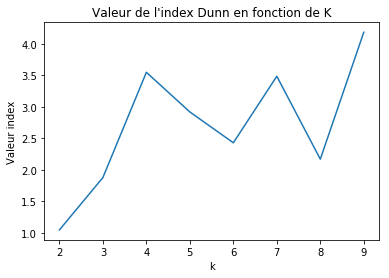

In [23]:
plt.plot(list_k,list_eval_Dunn)
plt.xlabel("k")
plt.ylabel("Valeur index")
plt.title("Valeur de l'index Dunn en fonction de K")

Text(0.5,1,"Valeur de l'index Xie-Beni en fonction de K")

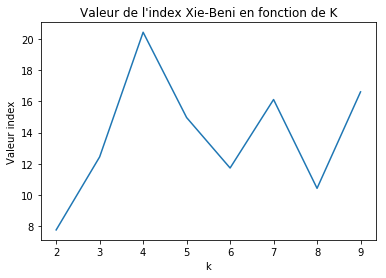

In [24]:
plt.plot(list_k,list_eval_XB)
plt.xlabel("k")
plt.ylabel("Valeur index")
plt.title("Valeur de l'index Xie-Beni en fonction de K")

Nous devons minimiser les valeurs des indexes. Dans notre cas, il y a deux gaussiens différents et on remarque clairement dans les graphiques que le nombre de clusters optimal est de k=2

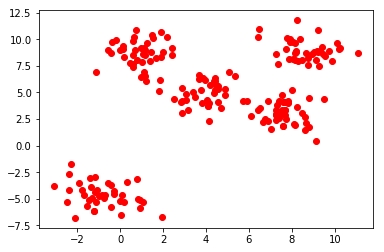

In [25]:
from sklearn.datasets import make_blobs

X, Y = make_blobs(n_samples=200, n_features=2, centers=5)

plt.scatter(X[:,0],X[:,1], color='r')
plt.show()
dfTest = pd.DataFrame(X,columns=['X','Y'])

In [26]:
list_k=[]
list_eval_Dunn=[]
list_eval_XB=[]


for k in range(2,10):
    centroids, l_affectation = km.kmoyennes(k, dfTest, 0.001, 100)
    list_k.append(k)
    list_eval_Dunn.append(evaluation("Dunn",dfTest,centroids,l_affectation))
    list_eval_XB.append(evaluation("XB",dfTest,centroids,l_affectation))
    

Iteration  0  Inertie :  5240.20997282  Difference :  2799.8218527799645
Iteration  1  Inertie :  2940.22025122  Difference :  2299.989721593362
Iteration  2  Inertie :  2940.22025122  Difference :  0.0
Iteration  0  Inertie :  3832.90544815  Difference :  4207.126377448393
Iteration  1  Inertie :  1772.98001563  Difference :  2059.9254325235092
Iteration  2  Inertie :  1569.96882265  Difference :  203.01119297797095
Iteration  3  Inertie :  1569.96882265  Difference :  0.0
Iteration  0  Inertie :  2548.44489239  Difference :  5491.586933208387
Iteration  1  Inertie :  881.937273313  Difference :  1666.507619076478
Iteration  2  Inertie :  792.278769689  Difference :  89.65850362404751
Iteration  3  Inertie :  775.783701554  Difference :  16.495068135516476
Iteration  4  Inertie :  771.183044548  Difference :  4.600657005745006
Iteration  5  Inertie :  766.463853968  Difference :  4.719190579852921
Iteration  6  Inertie :  763.72612658  Difference :  2.737727387971745
Iteration  7  Ine

Text(0.5,1,"Valeur de l'index Xie-Beni en fonction de K")

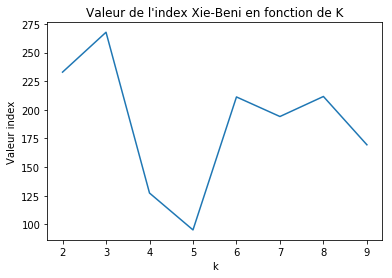

In [27]:
plt.plot(list_k,list_eval_XB)
plt.xlabel("k")
plt.ylabel("Valeur index")
plt.title("Valeur de l'index Xie-Beni en fonction de K")

Text(0.5,1,"Valeur de l'index Xie-Beni en fonction de K")

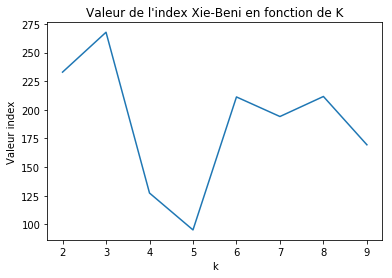

In [28]:
plt.plot(list_k,list_eval_XB)
plt.xlabel("k")
plt.ylabel("Valeur index")
plt.title("Valeur de l'index Xie-Beni en fonction de K")

Ici nous avons 5 gaussiens différents et on remarque qu'il y a 4 groupes de données très distincts donc la valeur de K optimale est k=4 d'après les observations sur le graphique.

## Application à des données réelles

- Appliquer l'algorithme aux données concernant les déchets de la ville de Paris
- Trouver des bases d'apprentissage intéressantes sur http://opendata.paris.fr/


In [29]:
dataParis = pd.read_csv("data/base-Paris.csv", sep=';')
arrd = dataParis['Granularité'].copy()
del dataParis['Granularité']
del dataParis['Total arrondissement 2011']

#convertir string en float
for i, row in dataParis.iterrows():
    for cl in dataParis.columns:
        row[cl] = row[cl].replace(' ', '')
        row[cl] = row[cl].replace(',','.')
        row[cl] = float(row[cl])
dataParis

,janv-11,févr-11,mars-11,avr-11,mai-11,juin-11,juil-11,août-11,sept-11,oct-11,nov-11,déc-11
0,288.1,249.1,303.7,255.8,287.8,288.4,249.6,185.6,281.3,284.3,296.4,301.1
1,596.5,540.2,618.5,558.6,595.9,581.7,539.2,490.5,597.8,575.7,580.5,601.4
2,464,404.9,465.3,420.2,405.3,446,412.9,348.7,449.3,446.3,453.1,484.3
3,903.1,801.4,937.5,835.5,876.8,888.6,628.8,674.8,913.3,878.7,895.7,935.8
4,451.1,412.4,491.6,422.7,363.6,446.4,409.5,332.3,416.4,451.5,475.1,513.5
5,427,394.3,455.2,419.9,458.3,456.6,418,361.8,464.6,453.4,478.5,470.9
6,323.4,287.3,350.3,317.8,336.9,340.7,311.6,281,345.6,335.6,367,354.5
7,153,125.8,136.6,126.6,133.2,127.6,126.7,114.3,144.3,145.1,129.5,129.8
8,116.3,115.7,133.4,115,123.2,120.5,114.5,97.6,130.5,123,124.3,133.7
9,252.6,246.7,252.9,232.5,199.4,236.4,175.4,189.4,266.6,230.3,257.7,224.4


In [30]:
indexDunn = []
indexXB = []
tabCentresMatrices = []
for k in list(range(2, 22)):
    
    print(" K = ", k)
    les_centres, l_affectation= km.kmoyennes(k, dataParis, 0.05, 100)
    
    tabCentresMatrices.append((les_centres, l_affectation))
    indexDunn.append(evaluation("Dunn", dataParis, les_centres, l_affectation))
    indexXB.append(evaluation("XB", dataParis, les_centres, l_affectation))

 K =  2
Iteration  0  Inertie :  488342633.631  Difference :  8324750.688947439
Iteration  1  Inertie :  432095231.925  Difference :  56247401.70605272
Iteration  2  Inertie :  223343341.123  Difference :  208751890.80184206
Iteration  3  Inertie :  8687784.075  Difference :  214655557.0481579
Iteration  4  Inertie :  8687784.075  Difference :  0.0
 K =  3
Iteration  0  Inertie :  484061968.674  Difference :  12605415.64611125
Iteration  1  Inertie :  398134070.588  Difference :  85927898.08555555
Iteration  2  Inertie :  6320141.02314  Difference :  391813929.56519604
Iteration  3  Inertie :  3826230.6675  Difference :  2493910.3556372556
Iteration  4  Inertie :  2991544.498  Difference :  834686.1694999994
Iteration  5  Inertie :  2829615.96788  Difference :  161928.53012121236
Iteration  6  Inertie :  2829615.96788  Difference :  0.0
 K =  4
Iteration  0  Inertie :  346939581.283  Difference :  149727803.03711122
Iteration  1  Inertie :  2641637.30681  Difference :  344297943.976079

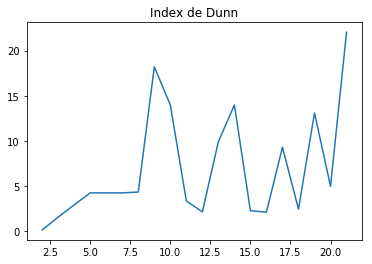

[0.11998332866726479, 1.541701493202168, 2.8927044993726523, 4.2266485054043326, 4.2266485054043326, 4.2266485054043326, 4.318096080047277, 18.200160340380233, 13.975929869684835, 3.3317524064270976, 2.1215391029847255, 9.9068604587070421, 13.975929869684835, 2.2432668274205669, 2.0920573003615353, 9.2909469445358308, 2.4296887255694353, 13.088650065322733, 4.9621223333809477, 22.037071032314245]


In [31]:
ks = list(range(2, 22))
plt.plot(ks, indexDunn)
plt.title("Index de Dunn")
plt.show()
print(indexDunn)

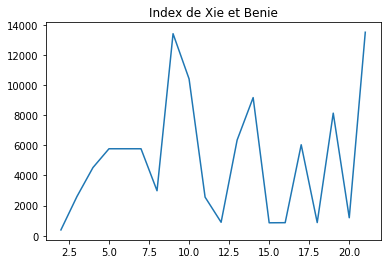

[383.80756932424885, 2601.0528824298876, 4525.7103908698409, 5775.1487376889872, 5775.1487376889872, 5775.1487376889872, 2986.2575695515034, 13419.332953000354, 10416.510991840532, 2562.11606705027, 891.6149280610216, 6353.002300820086, 9174.0185691658062, 857.20954562750228, 864.1640406655381, 6040.8674802992309, 872.83658926379019, 8140.599748996352, 1193.3864033058771, 13515.995061566311]


In [34]:
plt.plot(ks, indexXB)
plt.title("Index de Xie et Benie")
plt.show()
print(indexXB)